In [1]:
import json

with open("/home/guest/AdvancedLLMReasoning/math_tutor_model/checkpoint-31680/trainer_state.json") as f:
    content = json.load(f)

type(content), list(content.keys())

(dict,
 ['best_global_step',
  'best_metric',
  'best_model_checkpoint',
  'epoch',
  'eval_steps',
  'global_step',
  'is_hyper_param_search',
  'is_local_process_zero',
  'is_world_process_zero',
  'log_history',
  'logging_steps',
  'max_steps',
  'num_input_tokens_seen',
  'num_train_epochs',
  'save_steps',
  'stateful_callbacks',
  'total_flos',
  'train_batch_size',
  'trial_name',
  'trial_params'])

In [12]:
train_loss = []
val_loss = []
for i, log in enumerate(content["log_history"]):
    if (i % 100) == 0:
        train_loss.append(log.get("loss", None))
    if "eval_loss" in log.keys():
        val_loss.append(log.get("eval_loss", None))

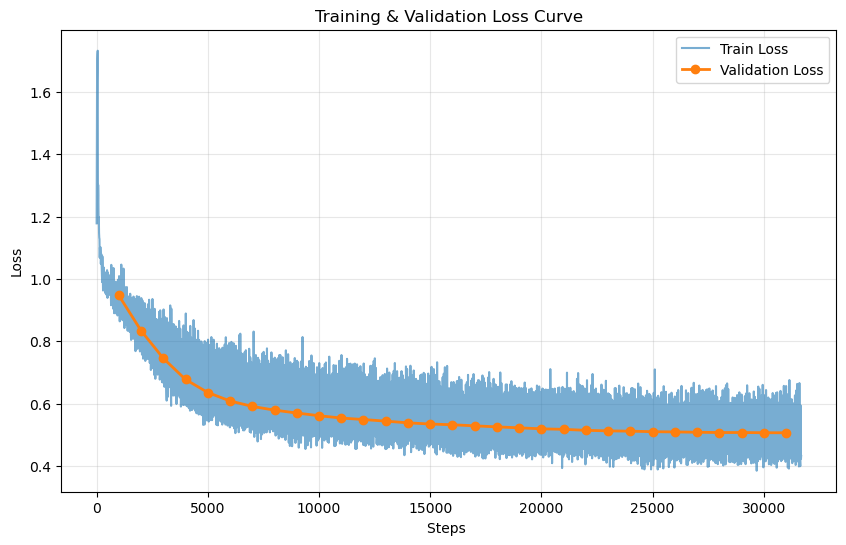

In [16]:
import matplotlib.pyplot as plt

# Khởi tạo 4 list để lưu giá trị và bước thời gian tương ứng
train_steps = []
train_loss = []

val_steps = []
val_loss = []

for log in content["log_history"]:
    if "loss" in log:
        train_loss.append(log["loss"])
        train_steps.append(log["step"])
        
    if "eval_loss" in log:
        val_loss.append(log["eval_loss"])
        val_steps.append(log["step"])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_loss, label='Train Loss', alpha=0.6, color='tab:blue')
plt.plot(val_steps, val_loss, label='Validation Loss', linewidth=2, color='tab:orange', marker='o')
plt.xlabel('Steps ')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()